In [2]:
import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

### Первая часть

In [3]:
# загружаем датасет
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Посчитать руками статистики $\bar{X}, s^2, \mu, MODE, X_{0.75} - X_{0.25}$ для поля mean symmetry

In [5]:
x = df['mean symmetry']
#Считаем среднее
mean_x = x.sum() / len(x)
print('mean = {}'.format(mean_x))

#Считаем дисперсию и стандартное отклонение
s_sqr_x = ((x-mean_x)**2).sum()/(len(x)-1)
std = s_sqr_x**0.5
print('sigma_sqr = {}'.format(s_sqr_x))
print('std = {}'.format(std))

#Считаем медиану
if len(x)%2 == 0:
    median_x = (sorted(x)[int(len(x)//2)] + sorted(x)[int(len(x)/2-1)]) / 2
else:
    median_x = sorted(x)[int(len(x)//2)]
print('median = {}'.format(median_x))

#Считаем моду
x_counter = {}
for i in x:
    if i not in x_counter:
        x_counter[i] = 1
    else:
        x_counter[i] += 1
max_counter = 0
mode_x = 0
for x_c, counter in x_counter.items():
    if max_counter < counter:
        max_counter = counter
        mode_x = x_c
print('mode = {}, counts {} times'.format(mode_x,max_counter))

#Считаем интерквантильный размах
y = sorted(x)
#    Первый квартиль
n_q1 = (len(y)+1) / 4
if n_q1 == int(n_q1):
    q1 = y[int(n_q1)]
else:
    q1 = y[int(n_q1)-1] + (y[int(n_q1)] - y[int(n_q1)-1]) * (int(n_q1)-n_q1)
#    Третий квартиль
n_q3 = 3 * (len(y)+1) / 4
if n_q3 == int(n_q3):
    q3 = y[int(n_q3)]
else:
    q3 = y[int(n_q3)-1] + (y[int(n_q3)] - y[int(n_q3)-1]) * (int(n_q3)-n_q3)
print('interquantile range = {}'.format(round(q3-q1,6)))
print('q1 = {}'.format(q1))
print('q3 = {}'.format(q3))

mean = 0.18116186291739894
sigma_sqr = 0.0007515428211713162
std = 0.027414281336035715
median = 0.1792
mode = 0.1769, counts 4 times
interquantile range = 0.0338
q1 = 0.1619
q3 = 0.1957


In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### С помощью seaborn найти пару наиболее зависимых и независимых признаков среди первых 5

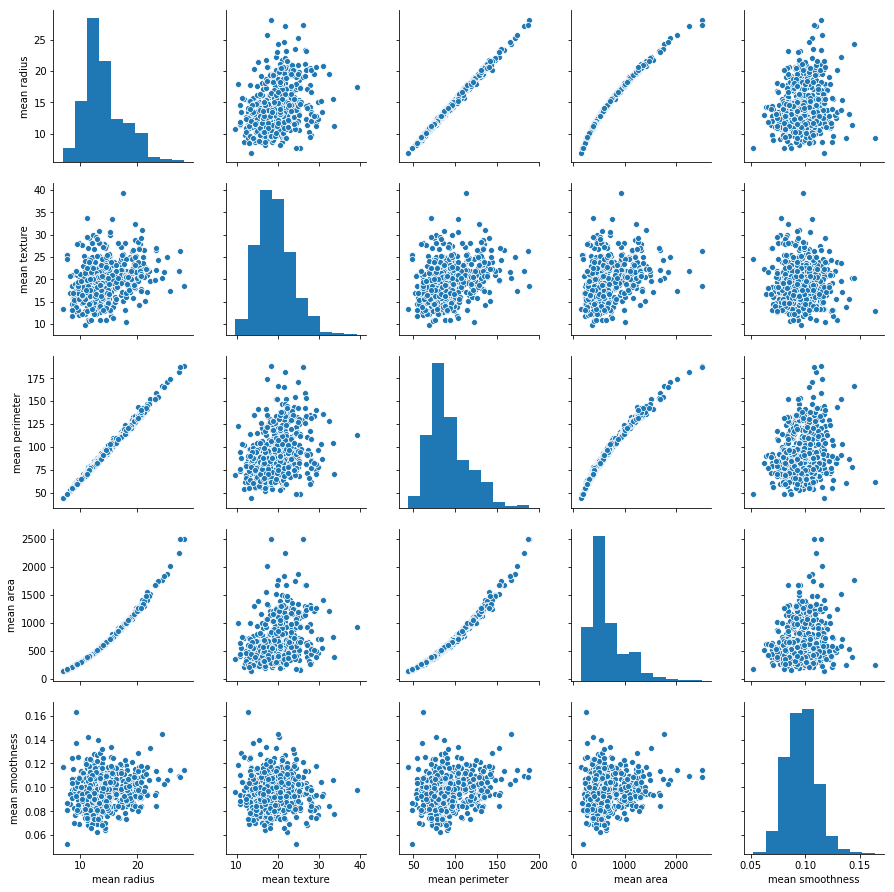

In [7]:
# your solution is here
sns.pairplot(df, vars=df.columns[0:5])

#### С помощью матрицы корреляций найти пару наиболее зависимых и независимых признаков среди первых 5

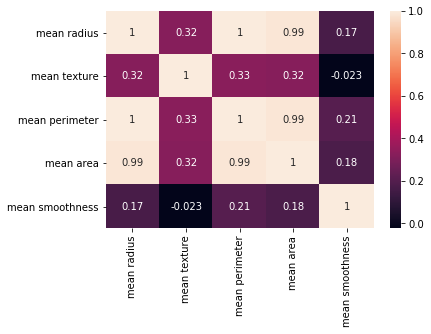

In [8]:
# your solution is here
sample = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']]
sample = sample.corr()
sns.heatmap(sample, annot=True)

Как ни странно, но мы наблюдаем сильную зависимость между:
- Mean radius & Mean perimeter (corr ~ 1)

Слабая взаимосвязь наблюдается между:
- Mean smoothness & Mean texture (corr ~ -0.023)

Думаю, это понятно из определения, но мы также визуализировали эти зависимости/различия

#### Проверить найденные пары t-тестом

In [9]:
# your solution is here
print(stats.ttest_ind(df['mean radius'], df['mean perimeter']))
print(stats.ttest_ind(df['mean smoothness'], df['mean texture']))

Ttest_indResult(statistic=-75.62417662792113, pvalue=0.0)
Ttest_indResult(statistic=-106.44619509686147, pvalue=0.0)


Я проверил найденные пары t-тестом, и разумеется, в обоих случаях отклонил нулевую гипотезу о равенстве средних.
Это говорит нам о том, что сравниваемые параметры не принадлежат к одной ген. совокупности и мы получили статистически значимые различия между двумя группами.

#### Проверить руками гипотезу $H_0: M_{mean\ compactness} = 0$ 

In [10]:
# your solution is here
print(stats.ttest_1samp(df['mean compactness'], 0))

Ttest_1sampResult(statistic=47.12726263249825, pvalue=2.0059202200488077e-198)


Отклоняем нулевую гипотезу, т.к. p-значение статистики сильно ниже 0.05. Среднее значение признака Mean compactness в ген. совокупности отлично от 0.

#### Нарисовать распределение признака worst texture с помощью
- диаграммы
- qq-plot
- эмпирическая ф.р.

In [11]:
# your solution is here
wt = df['worst texture']
wt.describe()

count    569.000000
mean      25.677223
std        6.146258
min       12.020000
25%       21.080000
50%       25.410000
75%       29.720000
max       49.540000
Name: worst texture, dtype: float64

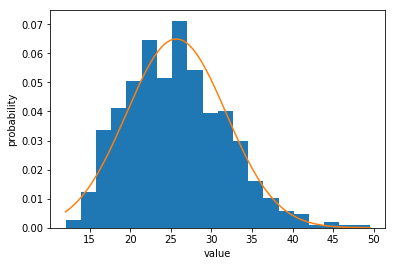

In [15]:
#Рисуем гистограмму
plt.hist(wt, bins=20, density=True)
plt.xlabel('value')
plt.ylabel('probability')
#Дорисовываем нормальное распределение
norm_rv = stats.norm(wt.mean(),wt.std())
x = np.linspace(wt.min(), wt.max(), len(wt))
y_norm = norm_rv.pdf(x)
plt.plot(x, y_norm)

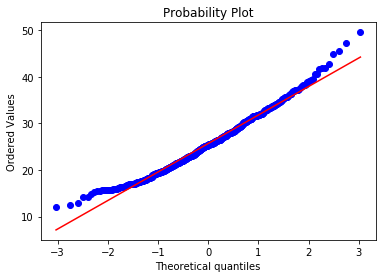

In [16]:
#Строим qq-plot
qq_wt = stats.probplot(wt, plot=plt)
#Распределение величины близко к нормальному, однако, у нас нехватает маленьких значений, и многовато больших

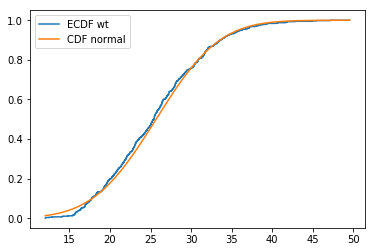

In [18]:
#Рисуем функции распределения наших данных
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(wt)
plt.step(ecdf.x, ecdf.y, label='ECDF wt')
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='CDF normal')
plt.legend()

### Вторая часть

Сгенерируйте выборку из пуассоновского распределения $Pois(\theta)$ для $\theta = 2$, записав
ее в виде матрицы ${\{X_{ij}\}}_{i=1...N, j=1...K}$ где $N= 1000$ и $K = 10000$.

Выполните следующую процедуру для всех $n=2, ...N$. Для всех $j = 1...K$ по выборке $\{X_{ij}\}_{i=1...n}$ оцените параметр $\theta$ с помощью оценки выборочного среднего $\hat{\theta_j^n}$ и оценки $\tilde{\theta}_j^n = \frac{1}{n-1} \sum_{i=1}^n\left(X_{ij} - \frac1n \sum_{i=1}^n X_{ij}\right)^2$. По выборкам $\{\hat{\theta}_j^n\}_{j=1...K}$ и $\{\tilde{\theta}_j^n\}_{j=1...K}$ для этих двух типов оценок найдите оценки дисперсий $\hat{\sigma}_n$ $\tilde{\sigma}_n$

Нарисуйте график оценок дисперсий в зависимости от $n$. При необходимости не забывайте выставлять значение plt.ylim. Сделайте выводы. **Постарайтесь решить эту задачу без циклов, используя только функции библиотеки numpy**

In [19]:
# your solution is here
pois = stats.poisson(2)
x = np.array([pois.rvs(10000) for x in range(1000)])

In [20]:
theta_cir = np.array([x[0:n+1].mean() for n in range(1, len(x))])

In [25]:
def theta_til_funct(x, theta_cir, n):
    a = (np.transpose((np.transpose(x[0:n]) - np.transpose(theta_cir[0:n])))**2 ).sum() / (len(x) - 1)
    return a

In [26]:
theta_til = np.array([theta_til_funct(x, theta_cir, n) for n in range(1, len(x))])

In [27]:
n = np.arange(0, len(theta_cir))

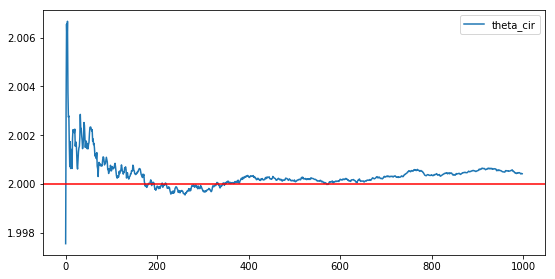

In [28]:
plt.figure(figsize=(9,4.5))
plt.plot(n, theta_cir, label='theta_cir')
plt.axhline(y=2, color='r', linestyle='-')
plt.legend()

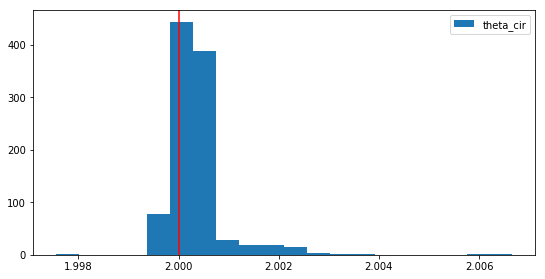

In [29]:
plt.figure(figsize=(9,4.5))
plt.hist(theta_cir, bins = 20, label='theta_cir')
plt.axvline(x=2, color='r', linestyle='-')
plt.legend()

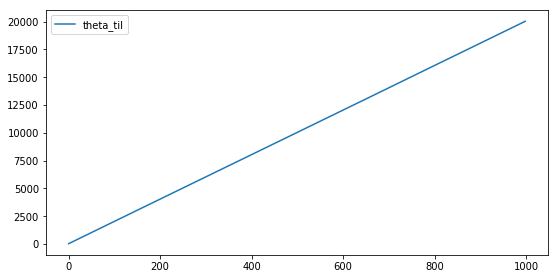

In [30]:
plt.figure(figsize=(9,4.5))
plt.plot(n, theta_til, label='theta_til')
plt.legend()